In [195]:
using ITensors
using Random
using Distributions
using DelimitedFiles
using Plots
using StatsBase
using JLD2
using Plots.Measures

In [196]:
train = readdlm("Earthquakes_TRAIN.txt")
X = train[:, 2:end]
y = Int.(train[:, 1]);

In [197]:
countmap(y)

Dict{Int64, Int64} with 2 entries:
  0 => 264
  1 => 58

In [198]:
y[10]

0

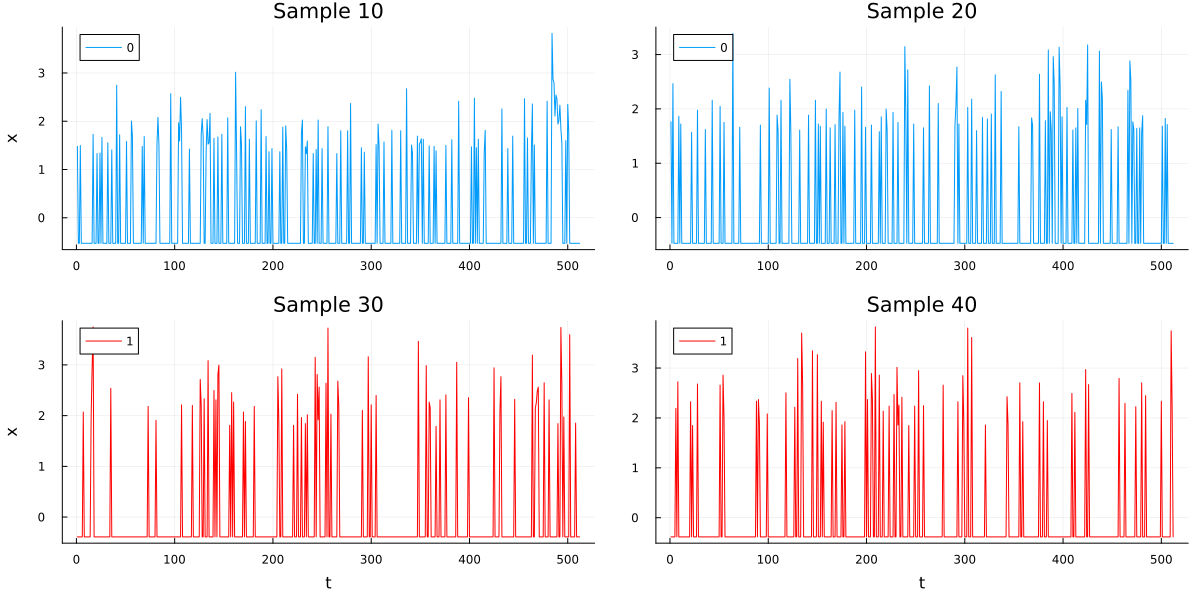

In [169]:
p1 = plot(X[10, :], title="Sample 10", label=y[10], size=(1200, 600))
ylabel!("x")
p2 = plot(X[20, :], title="Sample 20", label=y[20])
p3 = plot(X[30, :], title="Sample 30", label=y[30], c=:red)
ylabel!("x")
xlabel!("t")
p4 = plot(X[40, :], title="Sample 40", label=y[40], c=:red)
xlabel!("t")
ps = [p1, p2, p3, p4]
plot(ps..., left_margin=5mm, bottom_margin=5mm)
#savefig("earthquakes_sample_time_series_unprocessed.svg")

In [170]:
binary_map_function = (x, min_val) -> x == min_val ? 0 : 1

#39 (generic function with 1 method)

In [171]:
mapped_ts = map(x -> binary_map_function(x, minimum(X[50,:])), X[50, :]);

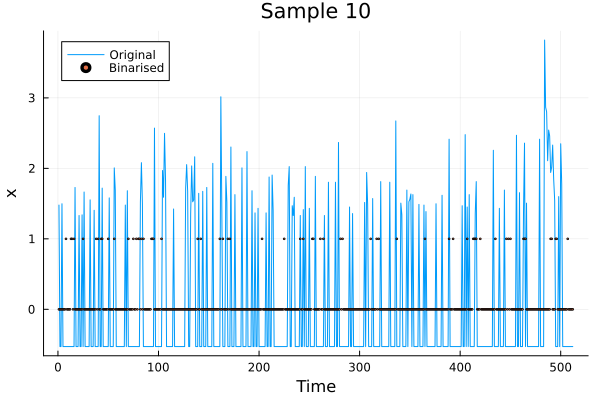

In [172]:
plot(X[10, :], label="Original")
scatter!(mapped_ts, ms=1, label="Binarised")
xlabel!("Time")
ylabel!("x")
title!("Sample 10")
#savefig("sample_10_transformed.svg")

# Transform entire dataset

In [173]:
X_binarised = Matrix{Int}(undef, size(X));

In [174]:
for i=1:size(X)[1]
    mapped_ts = map(x -> binary_map_function(x, minimum(X[i,:])), X[i, :]);
    X_binarised[i, :] = mapped_ts
end

In [175]:
X_binarised

322×512 Matrix{Int64}:
 0  0  1  0  0  0  0  1  1  0  0  1  0  …  0  0  0  0  0  0  0  0  0  0  1  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  1  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  1  0  0     0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0
 0  1  1  0  0  1  1  1  0  0  0  1  1     0  0  1  0  0  0  1  0  0  0  1  0
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  1  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱  ⋮              ⋮              ⋮  
 0  0  0  0  0  1  0  0  1  0  0  0  1     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  1  1  0  1  0  1  0  1  0  0    

In [176]:
test = readdlm("Earthquakes_TEST.txt")
X_test = test[:, 2:end]
y_test = Int.(test[:, 1]);

In [177]:
X_test_binarised = Matrix{Int}(undef, size(X_test));

In [178]:
for i=1:size(X_test)[1]
    mapped_ts = map(x -> binary_map_function(x, minimum(X_test[i,:])), X_test[i, :]);
    X_test_binarised[i, :] = mapped_ts
end

In [179]:
X_test_binarised

139×512 Matrix{Int64}:
 0  0  0  0  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  0  0  0     0  0  0  1  0  1  0  0  0  0  1  0
 1  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  1  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  1  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  0  1  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  1  0  0  0  1  1  0  0     1  0  0  0  0  1  0  1  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  1     1  0  1  0  1  1  0  1  1  0  0  0
 0  0  1  0  0  1  0  0  0  0  0  0  1     0  0  1  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱  ⋮              ⋮              ⋮  
 0  1  0  1  0  1  1  0  0  0  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  0  0  0  0    

In [180]:
total_samples = size(X)[1] + size(X_test)[1]

461

Do a 60/20/20 split

In [181]:
train_size = Int(floor(0.6 * total_samples))
val_size = Int(round((total_samples - train_size)/2, RoundDown))
test_size = total_samples - (train_size + val_size);

Combine datasets:

In [182]:
X_combined = vcat(X_binarised, X_test_binarised)
y_combined = vcat(y, y_test);

In [183]:
size(X_combined)[1]

461

In [184]:
y_combined[1]

1

In [185]:
train_idxs = StatsBase.sample(1:size(X_combined)[1], train_size; replace=false)
X_train = X_combined[train_idxs, :]
y_train = y_combined[train_idxs]

276-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [186]:
remaining_idxs = setdiff(collect(1:size(X_combined)[1]), train_idxs);
val_idxs = StatsBase.sample(remaining_idxs, val_size; replace=false)
X_val = X_combined[val_idxs, :]
y_val = y_combined[val_idxs];

In [187]:
train_val_combined = vcat(train_idxs, val_idxs)

368-element Vector{Int64}:
  75
 165
 230
 296
 291
 414
 438
  67
 379
  14
   ⋮
 281
 173
  35
 403
 184
 405
 166
  79
   9

In [188]:
test_idxs = setdiff(collect(1:size(X_combined)[1]), vcat(train_idxs, val_idxs));

In [189]:
X_test = X_combined[test_idxs, :]
y_test = y_combined[test_idxs];

In [190]:
countmap(y_test)

Dict{Int64, Int64} with 2 entries:
  0 => 76
  1 => 17

In [191]:
countmap(y_val)

Dict{Int64, Int64} with 2 entries:
  0 => 76
  1 => 16

In [192]:
countmap(y_train)

Dict{Int64, Int64} with 2 entries:
  0 => 216
  1 => 60

Class distributions roughly the same across train/val/test splits

In [193]:
@save "train_data_earth.jld2" X_train y_train
@save "val_data_earth.jld2" X_val y_val
@save "test_data_earth.jld2" X_test y_test